In [ ]:
# Build image classification model using CNN on fashion MNIST dataset.

# Importing Packages
import numpy as np
from matplotlib import pyplot
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train.shape, y_train.shape, "____" , X_test.shape, y_test.shape
((60000, 28, 28), (60000,), '____', (10000, 28, 28), (10000,))
X_train[0]

4422102/4422102 [==============================] - 0s 0us/step


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
class_labels = ["Trouser", "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker", "Bag", "Ankle boot"]
class_labels


['Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

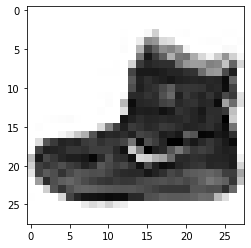

In [ ]:
plt.imshow(X_train[0] , cmap="Greys")

Text(0.5, 1.0, 'Bag / 7')

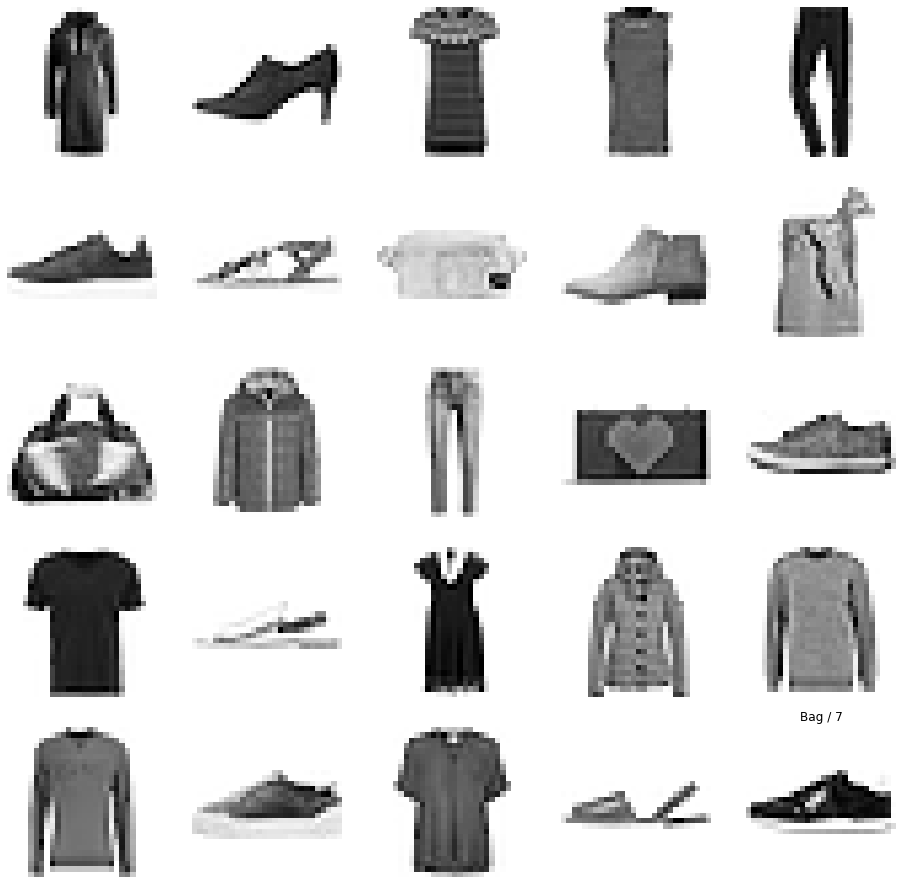

In [ ]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j)
  j+=1
  plt.imshow(X_train[i],cmap="Greys")
  plt.axis('off')
plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))

In [ ]:
X_train. shape

(60000, 28, 28)

In [ ]:
X_train.ndim

3

In [ ]:
X_train = np.expand_dims(X_train, -1)
X_test =np.expand_dims(X_test, -1)

In [ ]:
X_train.ndim

4

In [ ]:
X_train =X_train/255
X_test = X_test/255

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.2, random_state=2020)

In [ ]:
X_train.shape, y_train.shape, X_validation.shape, y_validation.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

In [ ]:
cnn = keras.models.Sequential([
    
    tf.keras.layers.Conv2D(filters=32, kernel_size=3,strides=(1,1),padding='valid', activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,strides=(2,2),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    
])

In [ ]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=20 , batch_size=16 , verbose=1 , validation_data=(X_validation, y_validation))

Epoch 1/20
3000/3000 [==============================] - 21s 4ms/step - loss: 0.5555 - accuracy: 0.7925 - val_loss: 0.4006 - val_accuracy: 0.8491
Epoch 2/20
3000/3000 [==============================] - 13s 4ms/step - loss: 0.3618 - accuracy: 0.8686 - val_loss: 0.3438 - val_accuracy: 0.8746
Epoch 3/20
3000/3000 [==============================] - 11s 4ms/step - loss: 0.3160 - accuracy: 0.8835 - val_loss: 0.3094 - val_accuracy: 0.8866
Epoch 4/20
3000/3000 [==============================] - 11s 4ms/step - loss: 0.2884 - accuracy: 0.8934 - val_loss: 0.3179 - val_accuracy: 0.8860
Epoch 5/20
3000/3000 [==============================] - 11s 4ms/step - loss: 0.2711 - accuracy: 0.9005 - val_loss: 0.2920 - val_accuracy: 0.8982
Epoch 6/20
3000/3000 [==============================] - 12s 4ms/step - loss: 0.2558 - accuracy: 0.9056 - val_loss: 0.2844 - val_accuracy: 0.9007
Epoch 7/20
3000/3000 [==============================] - 13s 4ms/step - loss: 0.2451 - accuracy: 0.9108 - val_loss: 0.2754 - val_ac

In [ ]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3384 - accuracy: 0.8986


[0.3384459614753723, 0.8985999822616577]

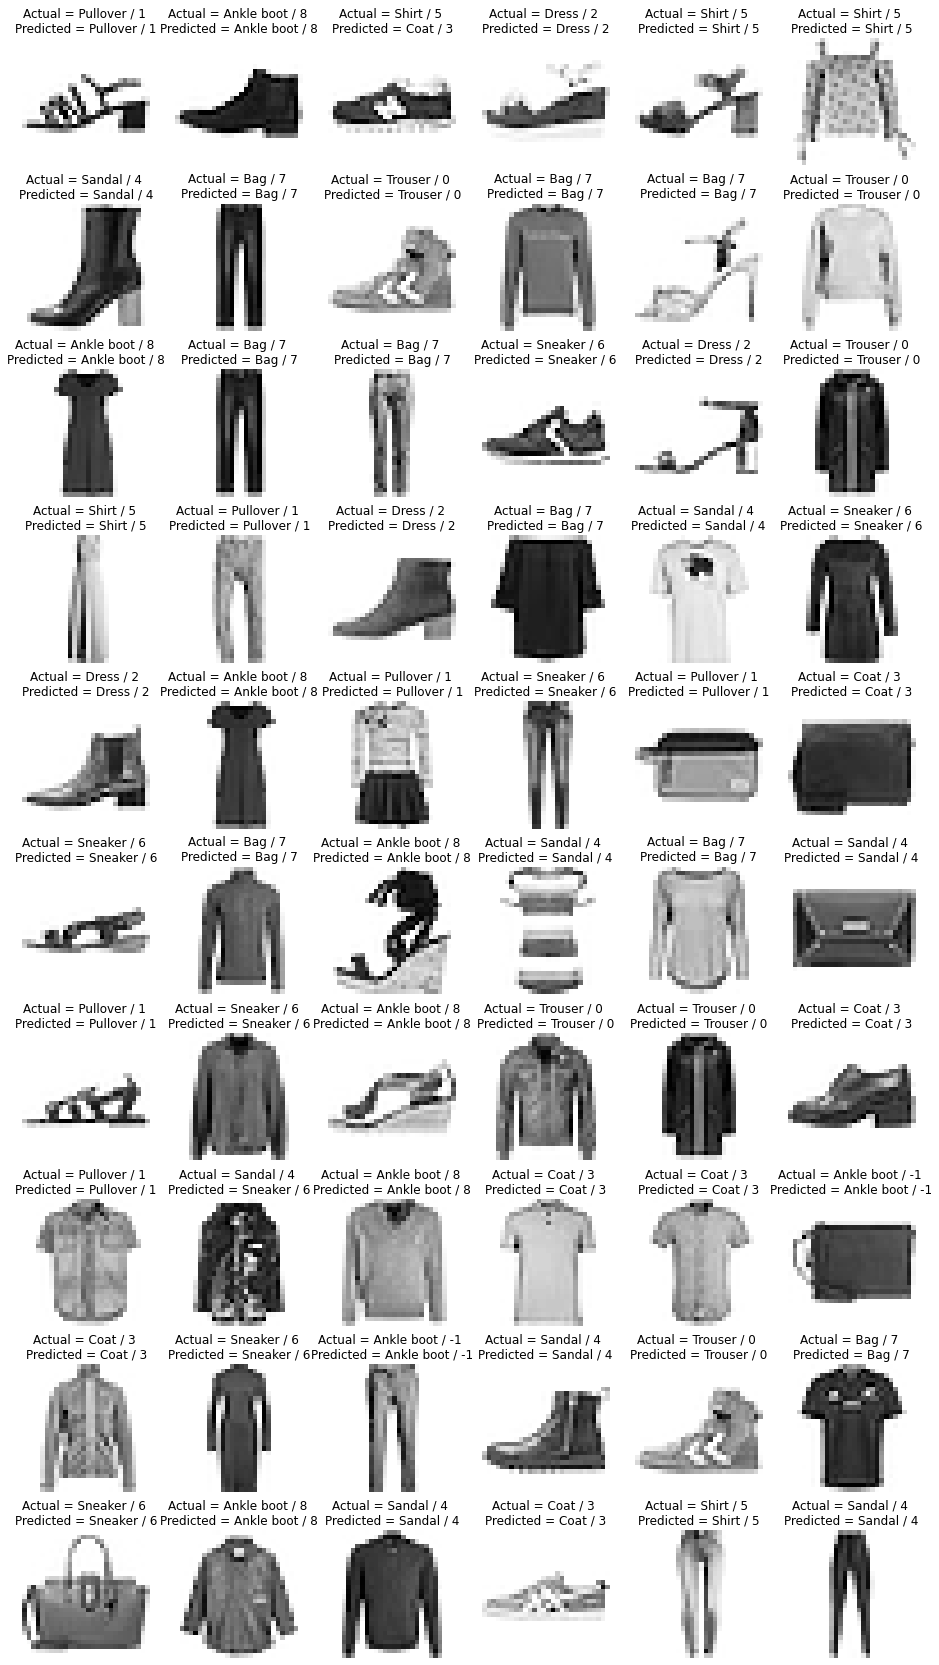

In [ ]:
plt.figure(figsize=(16,30))
j=1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j)
  j+=1
  plt.imshow(X_train[i].reshape(28,28),cmap='Greys')
  plt.axis('off')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]-1], y_test[i]-1, class_labels[np.argmax(y_pred[i])-1],np.argmax(y_pred[i])-1))

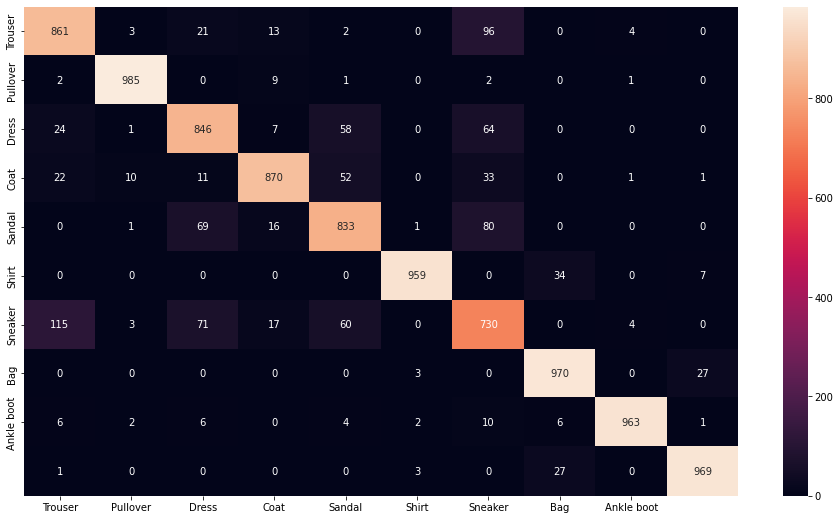

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test , y_pred_labels)

sns.heatmap(cm , annot=True , fmt='d' , xticklabels=class_labels , yticklabels=class_labels)

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test , y_pred_labels)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       0.98      0.98      0.98      1000
           2       0.83      0.85      0.84      1000
           3       0.93      0.87      0.90      1000
           4       0.82      0.83      0.83      1000
           5       0.99      0.96      0.97      1000
           6       0.72      0.73      0.72      1000
           7       0.94      0.97      0.95      1000
           8       0.99      0.96      0.98      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
cnn.save('fashion_mnist_cnn_model')